In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [2]:
# pip install xlrd>=2.0.1 

In [3]:
data1 = pd.read_excel("NG_PRI_FUT_S1_D.xls", sheet_name='Data 2')

futdata = data1.iloc[2:, [1, 0]].rename(columns={data1.columns[1]: 'RCLC1 Price', 'Back to Contents': 'Date'})
futdata['Date'] = pd.to_datetime(futdata['Date']).dt.date  # Convert date to a more readable format
futdata

,RCLC1 Price,Date
2,NaN,1993-12-20
3,NaN,1993-12-21
4,NaN,1993-12-22
5,NaN,1993-12-23
6,NaN,1993-12-27
...,...,...
7565,2.1,2024-01-31
7566,2.05,2024-02-01
7567,2.079,2024-02-02
7568,2.082,2024-02-05


In [4]:
filtered_data = futdata[(futdata['Date'] >= pd.to_datetime('1994-01-01').date()) & 
                           (futdata['Date'] <= pd.to_datetime('2022-7-31').date())]


filtered_data_copy = filtered_data.copy()


filtered_data_copy['RCLC1 Price'] = pd.to_numeric(filtered_data_copy['RCLC1 Price'], errors='coerce')
filtered_data_copy['RCLC1 Price'] = filtered_data_copy['RCLC1 Price'].ffill()
# Calculate daily returns
filtered_data_copy['Daily Return'] = np.log(1+filtered_data_copy['RCLC1 Price'].pct_change())
# filtered_data_copy['Daily Return'] = filtered_data_copy['RCLC1 Price'].pct_change()

filtered_data_copy

,RCLC1 Price,Date,Daily Return
10,NaN,1994-01-03,NaN
11,NaN,1994-01-04,NaN
12,NaN,1994-01-05,NaN
13,NaN,1994-01-06,NaN
14,NaN,1994-01-07,NaN
...,...,...,...
7183,8.727,2022-07-25,0.050287
7184,8.993,2022-07-26,0.030025
7185,8.687,2022-07-27,-0.034619
7186,8.134,2022-07-28,-0.065775


In [5]:
# Calculate the mean and standard deviation
mean_return = filtered_data_copy['Daily Return'].mean()
std_return = filtered_data_copy['Daily Return'].std()

# Threshold for outliers
threshold_std = 20

# Define the upper and lower limits for non-outlier data
lower_limit = mean_return - (threshold_std * std_return)
upper_limit = mean_return + (threshold_std * std_return)

# Filter the DataFrame to exclude outliers
filtered_data_copy = filtered_data_copy[(filtered_data_copy['Daily Return'] >= lower_limit) & (filtered_data_copy['Daily Return'] <= upper_limit)]

filtered_data_copy

,RCLC1 Price,Date,Daily Return
19,2.268,1994-01-14,0.033172
20,2.360,1994-01-17,0.039763
21,2.318,1994-01-18,-0.017957
22,2.252,1994-01-19,-0.028886
23,2.250,1994-01-20,-0.000888
...,...,...,...
7183,8.727,2022-07-25,0.050287
7184,8.993,2022-07-26,0.030025
7185,8.687,2022-07-27,-0.034619
7186,8.134,2022-07-28,-0.065775


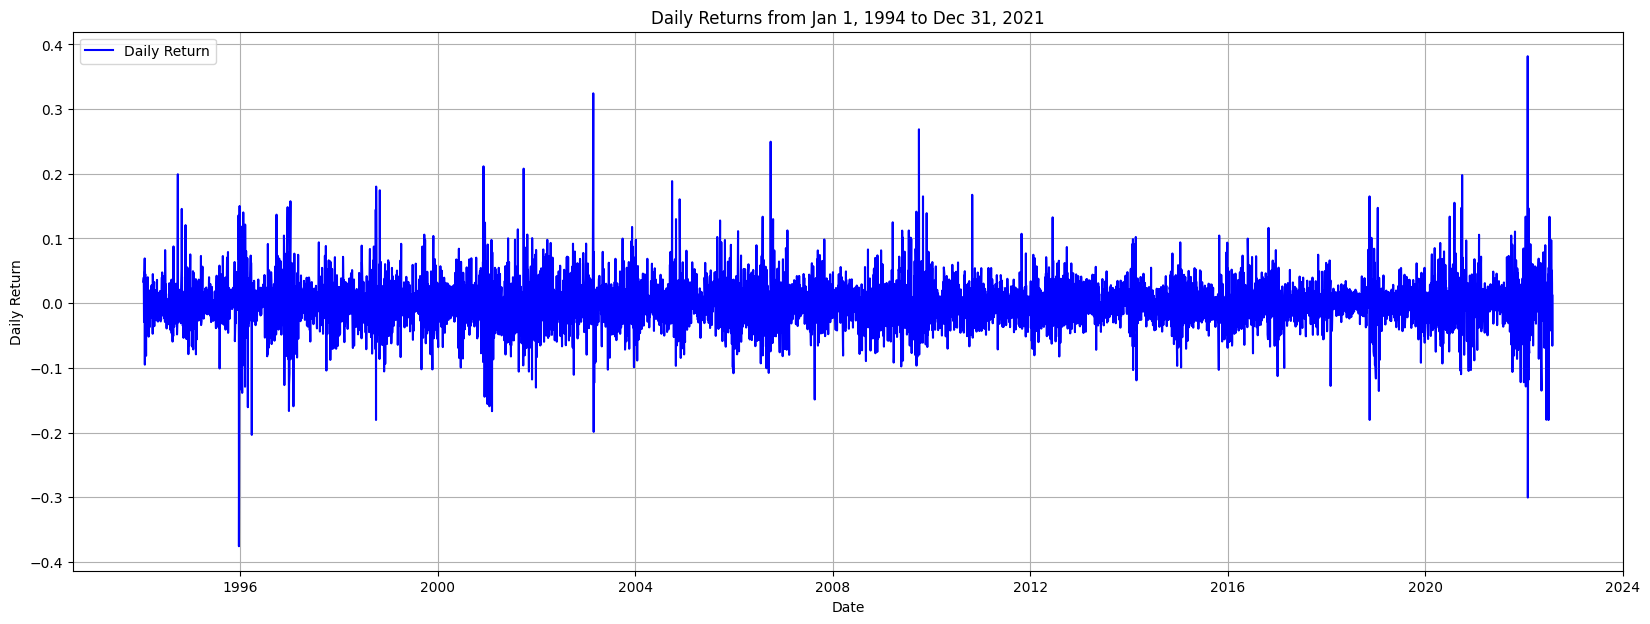

In [6]:
# Plotting the daily returns
plt.figure(figsize=(20, 7))
plt.plot(filtered_data_copy['Date'], filtered_data_copy['Daily Return'], label='Daily Return', color='blue')
plt.title('Daily Returns from Jan 1, 1994 to Dec 31, 2021')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)

plt.show()

In [7]:
disaster = pd.read_excel("public_emdat_custom_request_2024-02-08_8b448bd7-b092-4d29-a511-ddcd39e1250b.xlsx")
disaster.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [8]:
disdata = disaster[["Start Year","Start Month"]]
disdata

,Start Year,Start Month
0,1992,NaN
1,1992,6.0
2,1991,3.0
3,1991,NaN
4,1991,NaN
...,...,...
10157,2023,1.0
10158,2023,8.0
10159,2023,1.0
10160,2023,3.0


In [9]:
grouped_disdata = disdata.groupby(['Start Year', 'Start Month']).size().reset_index(name='count')
grouped_disdata

,Start Year,Start Month,count
0,1991,1.0,13
1,1991,2.0,13
2,1991,3.0,21
3,1991,4.0,13
4,1991,5.0,13
...,...,...,...
391,2023,8.0,27
392,2023,9.0,17
393,2023,10.0,21
394,2023,11.0,39


In [10]:
# Ensure 'Start Month' is an integer
grouped_disdata['Start Month'] = grouped_disdata['Start Month'].astype(int)

# Combine 'Start Year' and 'Start Month' into one column with a YYYY-MM format
grouped_disdata['Year_Month'] = grouped_disdata['Start Year'].astype(str) + '-' + grouped_disdata['Start Month'].apply(lambda x: f'{x:02}')

#convert 'Year_Month' to a datetime format
grouped_disdata['Year_Month'] = pd.to_datetime(grouped_disdata['Year_Month'])

print(grouped_disdata.head())

   Start Year  Start Month  count Year_Month
0        1991            1     13 1991-01-01
1        1991            2     13 1991-02-01
2        1991            3     21 1991-03-01
3        1991            4     13 1991-04-01
4        1991            5     13 1991-05-01


In [11]:
#in sample
monthly_totals_disdata_filtered = grouped_disdata[(grouped_disdata['Start Year'] >= 1994) & (grouped_disdata['Start Year'] < 2023)]
monthly_totals_disdata_filtered = monthly_totals_disdata_filtered[:-5]

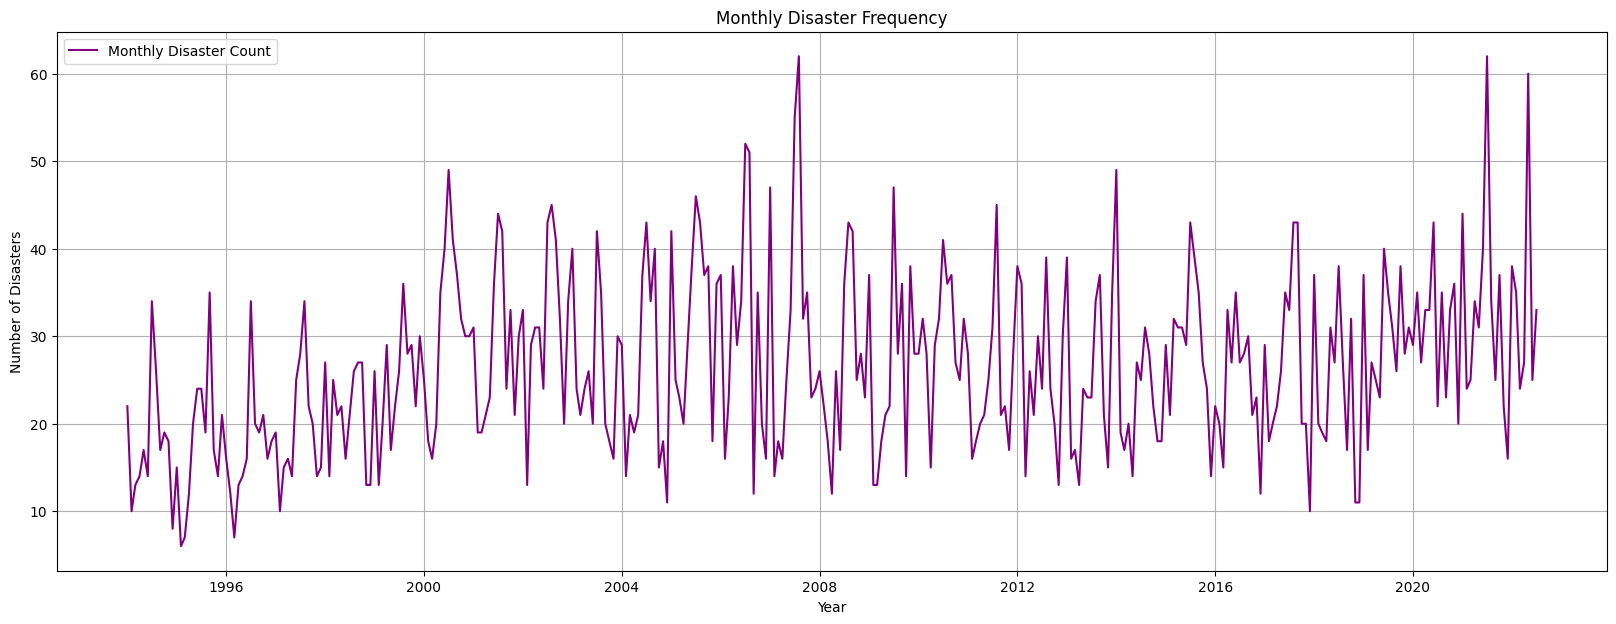

In [12]:
# Plotting the monthly totals of disasters
plt.figure(figsize=(20, 7))
plt.plot(monthly_totals_disdata_filtered['Year_Month'],monthly_totals_disdata_filtered['count'], label='Monthly Disaster Count', color='purple')
plt.title('Monthly Disaster Frequency')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [13]:
cpu = pd.read_csv("CPU index.csv",skiprows=4)
cpu

,date,cpu_index,old_cpu_index
0,Apr-87,43.589069,NaN
1,May-87,41.862022,NaN
2,Jun-87,71.135203,NaN
3,Jul-87,53.756704,NaN
4,Aug-87,60.615545,NaN
...,...,...,...
436,Aug-23,153.417951,NaN
437,Sep-23,213.599284,NaN
438,Oct-23,150.606362,NaN
439,Nov-23,249.287756,NaN


In [14]:
cpu['date'] = pd.to_datetime(cpu['date'], format='%b-%y', errors='coerce')

In [15]:
cpu.to_csv("cpu.csv")

In [16]:
#in sample
cpu_filtered = cpu.copy()
cpu_filtered['date'] = pd.to_datetime(cpu_filtered['date'])
cpu_filtered = cpu[(cpu['date'] >= pd.to_datetime('1994-01')) & (cpu['date'] <= pd.to_datetime('2022-07'))]

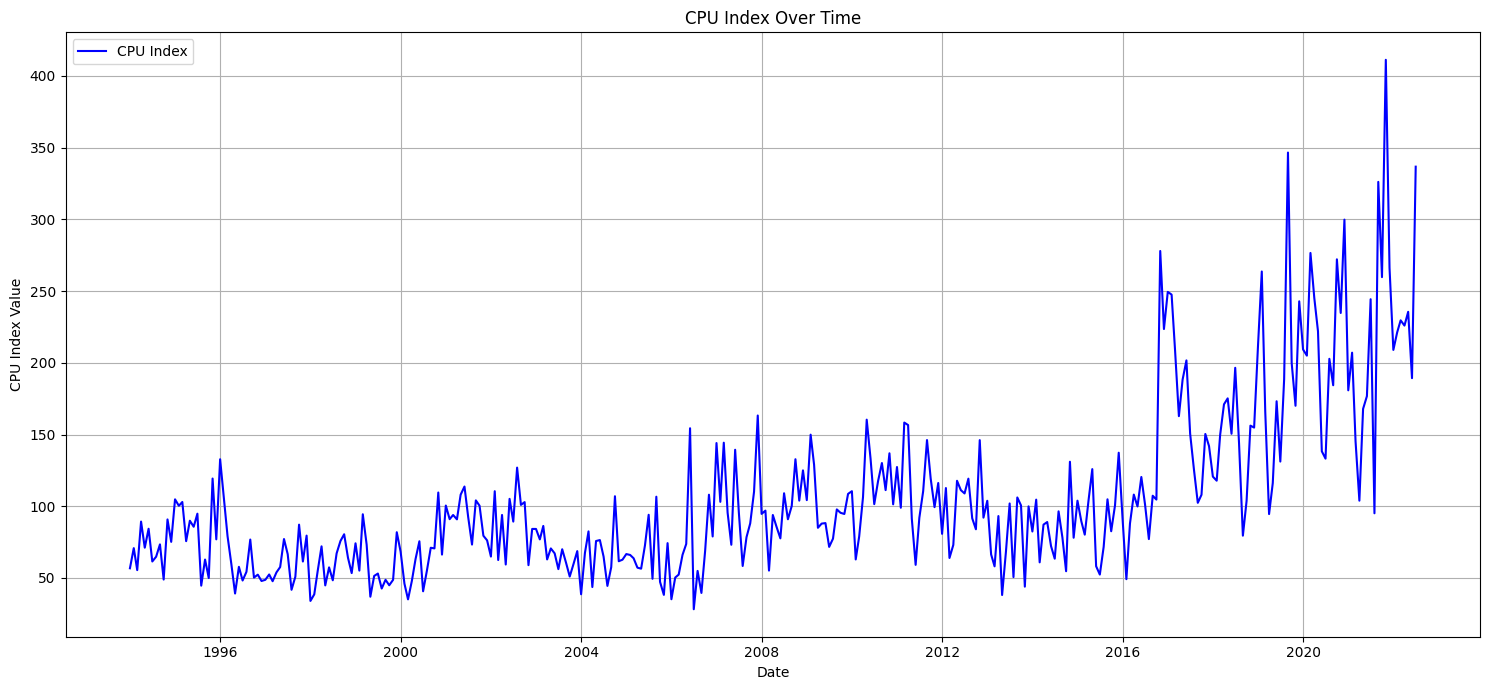

In [17]:
# Convert 'date' to datetime for proper plotting
cpu['date'] = pd.to_datetime(cpu['date'], format='%b-%y', errors='coerce')

# Drop rows where the date couldn't be converted
cpu = cpu.dropna(subset=['date'])

# Plotting the CPU Index
plt.figure(figsize=(15, 7))
plt.plot(cpu_filtered['date'], cpu_filtered['cpu_index'], label='CPU Index', color='blue')
plt.title('CPU Index Over Time')
plt.xlabel('Date')
plt.ylabel('CPU Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

In [18]:
#futures price 
fut_is = filtered_data_copy

#disasters frequency
dis_is = monthly_totals_disdata_filtered

#CPU
cpu_is = cpu_filtered

In [19]:
fut_is

,RCLC1 Price,Date,Daily Return
19,2.268,1994-01-14,0.033172
20,2.360,1994-01-17,0.039763
21,2.318,1994-01-18,-0.017957
22,2.252,1994-01-19,-0.028886
23,2.250,1994-01-20,-0.000888
...,...,...,...
7183,8.727,2022-07-25,0.050287
7184,8.993,2022-07-26,0.030025
7185,8.687,2022-07-27,-0.034619
7186,8.134,2022-07-28,-0.065775


In [20]:
print(fut_is.count())
print(fut_is["Daily Return"].mean(),fut_is["Daily Return"].std())
print(fut_is["Daily Return"].min(),fut_is["Daily Return"].max())
print(stats.skew(fut_is["Daily Return"],bias = False))
print(stats.kurtosis(fut_is["Daily Return"],bias = False))
adfuller(fut_is["Daily Return"])

RCLC1 Price     7169
Date            7169
Daily Return    7169
dtype: int64
0.00018439644842663445 0.036164746018691636
-0.3757486357796875 0.3817267591032599
0.25321431139173733
8.337816655342808


(-17.4275470647263,
 4.787319102932971e-30,
 27,
 7141,
 {'1%': -3.431266069487308,
  '5%': -2.8619448303738064,
  '10%': -2.5669854870973636},
 -27168.465719876207)

In [21]:
dis_is

,Start Year,Start Month,count,Year_Month
36,1994,1,22,1994-01-01
37,1994,2,10,1994-02-01
38,1994,3,13,1994-03-01
39,1994,4,14,1994-04-01
40,1994,5,17,1994-05-01
...,...,...,...,...
374,2022,3,24,2022-03-01
375,2022,4,27,2022-04-01
376,2022,5,60,2022-05-01
377,2022,6,25,2022-06-01


In [22]:
print(dis_is.count())
print(dis_is["count"].mean(),dis_is["count"].std())
print(dis_is["count"].min(),dis_is["count"].max())
print(stats.skew(dis_is["count"][1:],bias = False))
print(stats.kurtosis(dis_is["count"][1:],bias = False))
adfuller(dis_is["count"][1:])

Start Year     343
Start Month    343
count          343
Year_Month     343
dtype: int64
26.44606413994169 10.01238300361501
6 62
0.6045495988326222
0.331620486573998


(-2.7706964846312325,
 0.06258301545021494,
 14,
 327,
 {'1%': -3.45050711373316,
  '5%': -2.8704195794076743,
  '10%': -2.571500856923753},
 2297.833044256986)

In [23]:
dis_is["count"] = (np.log(dis_is["count"])).diff()
dis_is

,Start Year,Start Month,count,Year_Month
36,1994,1,NaN,1994-01-01
37,1994,2,-0.788457,1994-02-01
38,1994,3,0.262364,1994-03-01
39,1994,4,0.074108,1994-04-01
40,1994,5,0.194156,1994-05-01
...,...,...,...,...
374,2022,3,-0.377294,2022-03-01
375,2022,4,0.117783,2022-04-01
376,2022,5,0.798508,2022-05-01
377,2022,6,-0.875469,2022-06-01


In [24]:
print(dis_is.count())
print(dis_is["count"].mean(),dis_is["count"].std())
print(dis_is["count"].min(),dis_is["count"].max())
print(stats.skew(dis_is["count"][1:],bias = False))
print(stats.kurtosis(dis_is["count"][1:],bias = False))
adfuller(dis_is["count"][1:])

Start Year     343
Start Month    343
count          342
Year_Month     343
dtype: int64
0.0011855704915443384 0.44683945307763784
-1.4469189829363254 1.3397743454849977
-0.03087865295567213
0.3286781904613041


(-8.24882838393568,
 5.460646472451274e-13,
 13,
 328,
 {'1%': -3.4504451681828194,
  '5%': -2.870392380216117,
  '10%': -2.571486353732897},
 187.96192345735153)

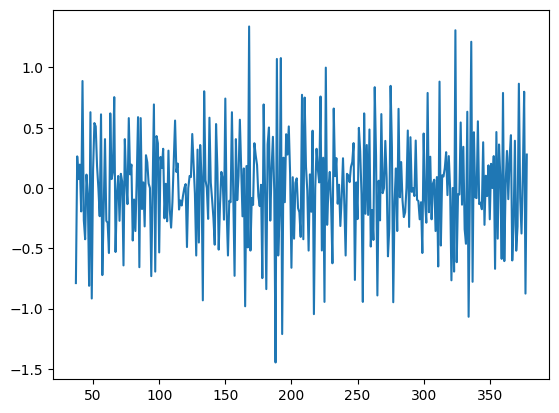

In [25]:
plt.plot(dis_is["count"])

In [26]:
print(cpu_is["cpu_index"].mean(),cpu_is["cpu_index"].std())
print(cpu_is["cpu_index"].min(),cpu_is["cpu_index"].max())
print(stats.skew(cpu_is["cpu_index"][1:],bias = False))
print(stats.kurtosis(cpu_is["cpu_index"][1:],bias = False))
adfuller(cpu_is["cpu_index"][1:])

104.62341508142856 59.43916546741159
28.16192749 411.2888056
1.8134320935267527
3.991171826778796


(0.43856908510807985,
 0.9828813803139389,
 12,
 329,
 {'1%': -3.4503836022181056,
  '5%': -2.8703653471616826,
  '10%': -2.571471939191249},
 3253.937477903806)

In [27]:
cpu_is["cpu_index"] = (np.log(cpu_is["cpu_index"])).diff()
cpu_is

C:\Users\bryan\AppData\Local\Temp\ipykernel_3296\2200400552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_is["cpu_index"] = (np.log(cpu_is["cpu_index"])).diff()


,date,cpu_index,old_cpu_index
81,1994-01-01,NaN,NaN
82,1994-02-01,0.221346,NaN
83,1994-03-01,-0.244231,NaN
84,1994-04-01,0.476465,NaN
85,1994-05-01,-0.228216,NaN
...,...,...,...
419,2022-03-01,0.036990,NaN
420,2022-04-01,-0.016012,NaN
421,2022-05-01,0.041567,NaN
422,2022-06-01,-0.218651,NaN


In [28]:
print(cpu_is["cpu_index"].mean(),cpu_is["cpu_index"].std())
print(cpu_is["cpu_index"].min(),cpu_is["cpu_index"].max())
print(stats.skew(cpu_is["cpu_index"][1:],bias = False))
print(stats.kurtosis(cpu_is["cpu_index"][1:],bias = False))
adfuller(cpu_is["cpu_index"][1:])

0.0052077777576005485 0.3722337415854811
-1.7013749373334903 1.232681814381344
-0.22620245086586144
0.9228275011983404


(-7.56876404774114,
 2.8784425351043482e-11,
 11,
 330,
 {'1%': -3.4503224123605194,
  '5%': -2.870338478726661,
  '10%': -2.571457612488522},
 178.7162224195307)

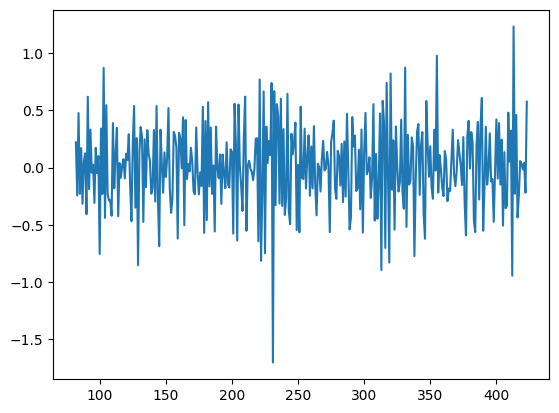

In [29]:
plt.plot(cpu_is["cpu_index"])

# GARCH REPLICATE

In [30]:
df1 = fut_is
df1 = df1.dropna()
df1

,RCLC1 Price,Date,Daily Return
19,2.268,1994-01-14,0.033172
20,2.360,1994-01-17,0.039763
21,2.318,1994-01-18,-0.017957
22,2.252,1994-01-19,-0.028886
23,2.250,1994-01-20,-0.000888
...,...,...,...
7183,8.727,2022-07-25,0.050287
7184,8.993,2022-07-26,0.030025
7185,8.687,2022-07-27,-0.034619
7186,8.134,2022-07-28,-0.065775


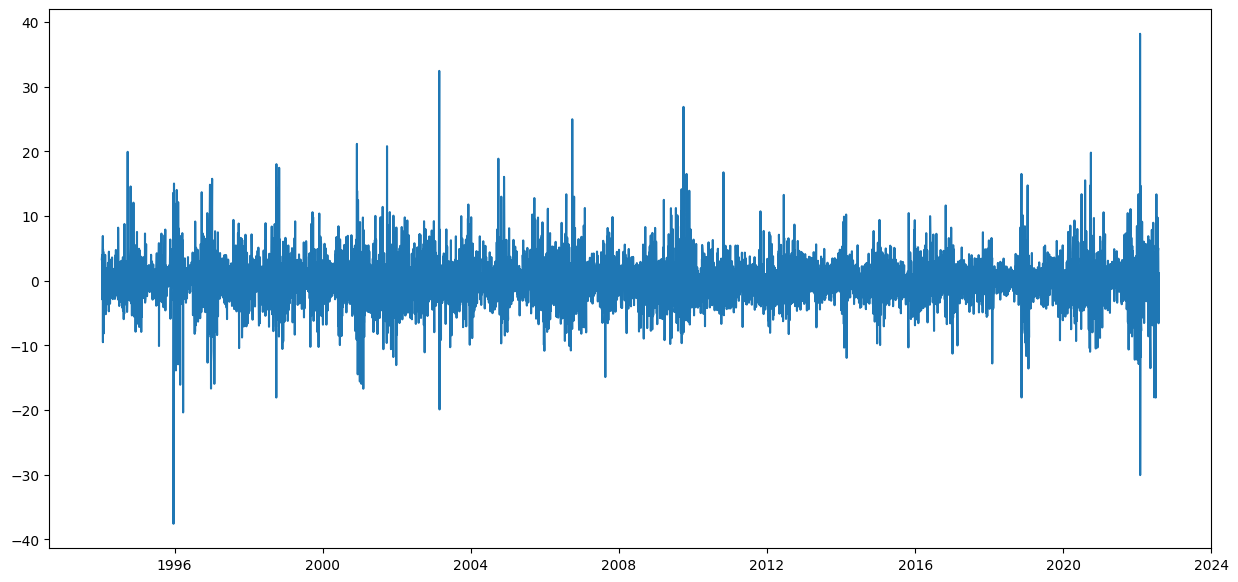

In [31]:
TIME=df1['Date']
SPRET=df1['Daily Return']*100

plt.figure(figsize=(15, 7))
plt.plot(TIME,SPRET)

In [32]:
daily_volatility = SPRET.std()
monthly_volatility = np.sqrt(21) * daily_volatility
annual_volatility = np.sqrt(252) * daily_volatility

from tabulate import tabulate
print(tabulate([['Natural Gas Futures',daily_volatility,monthly_volatility,annual_volatility]],headers = 
['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign =
'center',floatfmt=".2f"))

╒═════════════════════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│                     │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞═════════════════════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ Natural Gas Futures │         3.62         │         16.57          │         57.41         │
╘═════════════════════╧══════════════════════╧════════════════════════╧═══════════════════════╛


In [33]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(SPRET, p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
gm_result = garch_model.fit(disp='on') ### disp='off' turns off the iteration lines
print(gm_result.params)
print('\n')  ### print new line
gm_forecast = gm_result.forecast(horizon = 10)
print(gm_forecast.variance.head())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 50052.52130867613
Iteration:      2,   Func. Count:     15,   Neg. LLF: 29769.97416579729
Iteration:      3,   Func. Count:     23,   Neg. LLF: 18761.347347726718
Iteration:      4,   Func. Count:     29,   Neg. LLF: 18686.92590491964
Iteration:      5,   Func. Count:     35,   Neg. LLF: 18608.15208457438
Iteration:      6,   Func. Count:     41,   Neg. LLF: 18631.692611760056
Iteration:      7,   Func. Count:     47,   Neg. LLF: 20021.18978558186
Iteration:      8,   Func. Count:     54,   Neg. LLF: 18603.89119927454
Iteration:      9,   Func. Count:     60,   Neg. LLF: 18603.470209314968
Iteration:     10,   Func. Count:     65,   Neg. LLF: 18603.470203553963
Iteration:     11,   Func. Count:     69,   Neg. LLF: 18603.47020355358
mu          0.046274
omega       0.165800
alpha[1]    0.095151
beta[1]     0.898104
Name: params, dtype: float64


           h.01       h.02       h.03       h.04       h.05       h.06  \
7187  30.325891

In [34]:
Z=garch_model.fit()
Z.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 50052.52130867613
Iteration:      2,   Func. Count:     15,   Neg. LLF: 29769.97416579729
Iteration:      3,   Func. Count:     23,   Neg. LLF: 18761.347347726718
Iteration:      4,   Func. Count:     29,   Neg. LLF: 18686.92590491964
Iteration:      5,   Func. Count:     35,   Neg. LLF: 18608.15208457438
Iteration:      6,   Func. Count:     41,   Neg. LLF: 18631.692611760056
Iteration:      7,   Func. Count:     47,   Neg. LLF: 20021.18978558186
Iteration:      8,   Func. Count:     54,   Neg. LLF: 18603.89119927454
Iteration:      9,   Func. Count:     60,   Neg. LLF: 18603.470209314968
Iteration:     10,   Func. Count:     65,   Neg. LLF: 18603.470203553963
Iteration:     11,   Func. Count:     69,   Neg. LLF: 18603.47020355358
Optimization terminated successfully    (Exit mode 0)
            Current function value: 18603.470203553963
            Iterations: 11
            Function evaluations: 69
            Gradient evaluation

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           Daily Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -18603.5
Distribution:                  Normal   AIC:                           37214.9
Method:            Maximum Likelihood   BIC:                           37242.5
                                        No. Observations:                 7169
Date:                Sun, Mar 10 2024   Df Residuals:                     7168
Time:                        18:30:35   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0463  3.629e-02      1.275      0.202 [-2.486e-02,  0.117]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1658  3.911e-02      4.239  2.244e-05 [8.914e-02,  0.242]
alpha[1]       0.0952  1.158e-02      8.218  2.075e-16 [7.246e-02,  0.118]
beta[1]        0.8981  1.038e-02     86.504      0.000   [  0.878,  0.918]
==========================================================================

Covariance estimator: robust
"""

In [35]:
df2=pd.DataFrame(fut_is)
print(df2)
SPRET=df2['Daily Return'] * 100 ### put back SPRET in a dataframe for rolling window app below

      RCLC1 Price        Date  Daily Return
19          2.268  1994-01-14      0.033172
20          2.360  1994-01-17      0.039763
21          2.318  1994-01-18     -0.017957
22          2.252  1994-01-19     -0.028886
23          2.250  1994-01-20     -0.000888
...           ...         ...           ...
7183        8.727  2022-07-25      0.050287
7184        8.993  2022-07-26      0.030025
7185        8.687  2022-07-27     -0.034619
7186        8.134  2022-07-28     -0.065775
7187        8.229  2022-07-29      0.011612

[7169 rows x 3 columns]


Text(0.5, 1.0, 'Rolling Prediction of daily S&P 500 return Volatility in %')

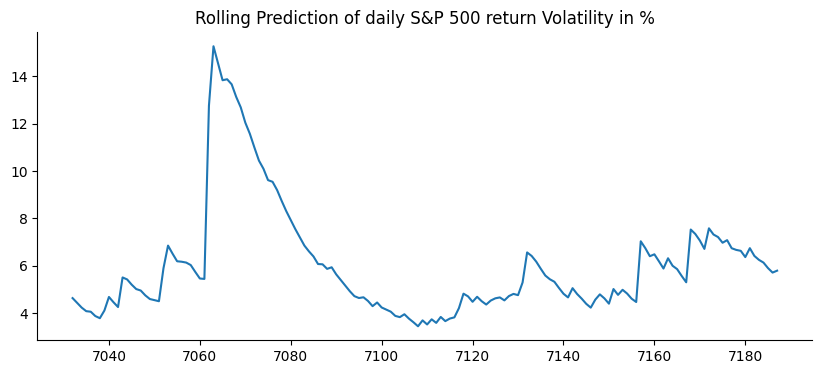

In [36]:
rolling_predictions = []
trgset_size = 7013  
### uses estimation sample of size 100 starting on 3 jan 2022 - 25 May 2022. Then after estimation of GARCH model
###   predicts variance of next day 26 May 2022. Then uses next rolling sample 4 jan 2022 - 26 May 2022, and predicts
###   variance of 27 May 2022, and so on. Sq root of var or vola is then stored in 'rolling_predictions' vector.
###   Altogether 151 predictions that starts on 26 May 2022 and ends on 30 Dec 2022.

for i in range(156):
    train = SPRET[i:i+trgset_size]  ### train has length 200, i.e. SPRET[1:201] has length 200
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=df2['Daily Return'].index[-156:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction of daily S&P 500 return Volatility in %')

In [37]:
rolling_predictions

7032    4.629576
7033    4.428502
7034    4.228603
7035    4.077700
7036    4.053958
          ...   
7183    6.245595
7184    6.129690
7185    5.895469
7186    5.707982
7187    5.789184
Length: 156, dtype: float64